In [7]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# Define 2-bit decoder dataset
inputs = np.array([
    [0, 0],  # 00
    [0, 1],  # 01
    [1, 0],  # 10
    [1, 1]   # 11
], dtype=np.float32)

targets = np.array([
    [1, 0, 0, 0],  # 00 -> [1, 0, 0, 0]
    [0, 1, 0, 0],  # 01 -> [0, 1, 0, 0]
    [0, 0, 1, 0],  # 10 -> [0, 0, 1, 0]
    [0, 0, 0, 1]   # 11 -> [0, 0, 0, 1]
], dtype=np.float32)

# Convert 2-bit input to a 7-dimensional input vector
def GetSevenInput(bits):
    return [bits[0], bits[1], 0, 0, 0, 0, 0]

# Quantum-inspired transformation
def yout(x1, x2, v1, v2):
    y1 = (x1 * cmath.exp(1j * 2 * cmath.pi * v1) + 1j * (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    y2 = (1j * x1 * cmath.exp(1j * 2 * cmath.pi * v1) + (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    return y1, y2

# Circle function with 4 output values
def Circle(x, v):
    x = GetSevenInput(x)
    # Layer 1
    y1_1, y1_2 = yout(x[0], x[1], v[0], v[1])
    # Layer 2
    y2_1, y2_2 = yout(x[2], x[3], v[2], v[3])
    # Layer 3
    y3_1, y3_2 = yout(x[4], x[5], v[4], v[5])
    # Combine outputs for final output
    y_out1, y_out2 = yout(y1_1, y2_1, v[6], v[6])
    y_out3, y_out4 = yout(y2_2, y3_2, v[6], v[6])
    return [abs(y_out1)**2, abs(y_out2)**2, abs(y_out3)**2, abs(y_out4)**2]

# Compute Mean Squared Error (MSE)
def GetAverageMSE(output_matrix, targets):
    mse = 0
    for i in range(len(targets)):
        mse += np.sum((output_matrix[i] - targets[i])**2)
    return mse / len(targets)

def NormalizeOutput(output):
    total = sum(output)
    return [o / total for o in output] if total > 0 else output

def GetCrossEntropyLoss(output, target):
    epsilon = 1e-8  # To avoid log(0)
    return -np.sum(target * np.log(output + epsilon)) / len(target)




In [ ]:
 # Training parameters
N_Circle = 8      # Number of layers
N_weight = 7      # Number of weights per layer
step = 0.1       # Step size for weight adjustment
N_changeweight = 200  # Number of weight adjustments
changed_weight = np.random.rand(N_Circle, N_weight)  # Initialize weights
MSEav_Array = []  # Store MSE over iterations

# Training loop
for iteration in range(1000):  # Number of iterations
    for _circle in range(N_Circle):  # Loop through each layer
        for _weight in range(N_weight):  # Loop through each weight
            for i in range(N_changeweight):  # Optimize each weight
                plusMat = changed_weight.copy()
                plusMat[_circle][_weight] += step  # Increase weight
                minusMat = changed_weight.copy()
                minusMat[_circle][_weight] -= step  # Decrease weight

                # Compute outputs
                output_plus = np.array([Circle(x, plusMat[_circle]) for x in inputs])
                output_minus = np.array([Circle(x, minusMat[_circle]) for x in inputs])

                # Compute MSE
                plusMSE = GetAverageMSE(output_plus, targets)
                minusMSE = GetAverageMSE(output_minus, targets)

                # Choose the direction that reduces MSE
                if plusMSE < minusMSE:
                    changed_weight = plusMat.copy()
                    MSEav_Array.append(plusMSE)
                else:
                    changed_weight = minusMat.copy()
                    MSEav_Array.append(minusMSE)

# Plot MSE
plt.plot(MSEav_Array)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Performance')
plt.show()

# Test the trained decoder
for i, x in enumerate(inputs):
    output = Circle(x, changed_weight[-1])  # Pass the input through the last trained layer
    output = [float(o) for o in output]  # Convert numpy.float32 to Python float
    predicted = np.argmax(output)  # Get the index of the largest output
    print(f"Input: {x}, Output: {output}, Predicted: {predicted}, Target: {np.argmax(targets[i])}")


Layer 1/20, Loss: 2.787948119370168
Layer 2/20, Loss: 2.788677882105144
Layer 3/20, Loss: 2.788994215809596
Layer 4/20, Loss: 2.788513216345983
Layer 5/20, Loss: 2.789243963376105
Layer 6/20, Loss: 2.7881126668191794
Layer 7/20, Loss: 2.7879049152574806
Layer 8/20, Loss: 2.7891270066454594
Layer 9/20, Loss: 2.78903375805902
Layer 10/20, Loss: 2.7884379530364862
Layer 11/20, Loss: 2.788149840159317
Layer 12/20, Loss: 2.789268320035987
Layer 13/20, Loss: 2.788770670795409
Layer 14/20, Loss: 2.7878188982933367
Layer 15/20, Loss: 2.789629237091601
Layer 16/20, Loss: 2.7885335347580726
Layer 17/20, Loss: 2.788660101113802
Layer 18/20, Loss: 2.789391594624508
Layer 19/20, Loss: 2.7882672357057054
Layer 20/20, Loss: 2.789121966457869


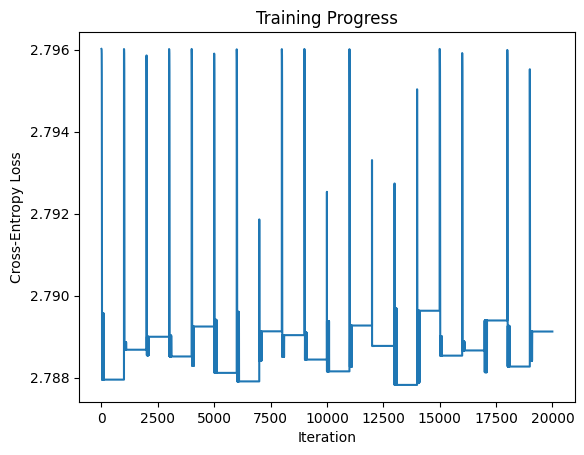

Input: [0. 0.], Output: [np.float64(0.25), np.float64(0.25), np.float64(0.25), np.float64(0.25)], Predicted: 0, Target: 0
Input: [0. 1.], Output: [np.float64(0.33323898540632785), np.float64(0.33323898540632785), np.float64(0.16676101459367215), np.float64(0.16676101459367215)], Predicted: 0, Target: 1
Input: [1. 0.], Output: [np.float64(0.33323898540632785), np.float64(0.33323898540632785), np.float64(0.16676101459367215), np.float64(0.16676101459367215)], Predicted: 0, Target: 2
Input: [1. 1.], Output: [np.float64(0.3882868359888664), np.float64(0.22342605029768142), np.float64(0.1941435568567261), np.float64(0.1941435568567261)], Predicted: 0, Target: 3


In [31]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

# Dataset: 2-bit decoder inputs and targets
inputs = np.array([
    [0, 0],  # 00
    [0, 1],  # 01
    [1, 0],  # 10
    [1, 1]   # 11
], dtype=np.float32)

targets = np.array([
    [1, 0, 0, 0],  # 00 -> [1, 0, 0, 0]
    [0, 1, 0, 0],  # 01 -> [0, 1, 0, 0]
    [0, 0, 1, 0],  # 10 -> [0, 0, 1, 0]
    [0, 0, 0, 1]   # 11 -> [0, 0, 0, 1]
], dtype=np.float32)

# Convert 2-bit input to 7-dimensional vector
def GetSevenInput(bits):
    return [bits[0], bits[1], 0, 0, 0, 0, 0]

# Quantum-inspired transformation
def yout(x1, x2, v1, v2):
    y1 = (x1 * cmath.exp(1j * 2 * cmath.pi * v1) + 1j * (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    y2 = (1j * x1 * cmath.exp(1j * 2 * cmath.pi * v1) + (x2 * cmath.exp(1j * 2 * cmath.pi * v2))) / cmath.sqrt(2)
    return y1, y2

# Scaled Sigmoid activation
def ScaledSigmoid(x, scale=10):
    return 1 / (1 + np.exp(-x * scale))

# Quantum-inspired Circle function with simplified activations
def Circle(x, v):
    x = GetSevenInput(x)
    y1_1, y1_2 = yout(x[0], x[1], v[0], v[1])
    y2_1, y2_2 = yout(x[2], x[3], v[2], v[3])
    y3_1, y3_2 = yout(x[4], x[5], v[4], v[5])
    y_out1 = ScaledSigmoid(abs(y1_1))
    y_out2 = ScaledSigmoid(abs(y1_2))
    y_out3 = ScaledSigmoid(abs(y2_1))
    y_out4 = ScaledSigmoid(abs(y2_2))
    return [y_out1, y_out2, y_out3, y_out4]

# Normalize the output to make it sum to 1
def NormalizeOutput(output):
    total = sum(output)
    return [o / total for o in output] if total > 0 else [1 / len(output)] * len(output)

# Softmax Cross-Entropy Loss
def Softmax(output, temperature=1.0):
    exp_output = np.exp(np.array(output) / temperature)
    return exp_output / np.sum(exp_output)

def GetSoftmaxCrossEntropyLoss(output, target, temperature=1.0):
    output = Softmax(output, temperature)
    return -np.sum(target * np.log(output + 1e-8)) / len(target)

# Initialize parameters
N_Circle = 20     # Increased number of layers
N_weight = 20     # Increased weights per layer
step = 0.01       # Larger step size
N_changeweight = 50  # More iterations per weight
changed_weight = np.random.uniform(-1, 1, (N_Circle, N_weight))  # Larger initialization range
MSEav_Array = []  # Store loss values during training

# Training process
for _circle in range(N_Circle):  # Loop through each layer
    for _weight in range(N_weight):  # Loop through each weight
        for _ in range(N_changeweight):  # Optimize each weight
            plusMat = changed_weight.copy()
            plusMat[_circle][_weight] += step
            minusMat = changed_weight.copy()
            minusMat[_circle][_weight] -= step

            # Compute outputs for all inputs
            outputPlus = np.array([NormalizeOutput(Circle(x, plusMat[_circle])) for x in inputs])
            outputMinus = np.array([NormalizeOutput(Circle(x, minusMat[_circle])) for x in inputs])

            # Compute Softmax Cross-Entropy Loss
            plusLoss = GetSoftmaxCrossEntropyLoss(outputPlus, targets)
            minusLoss = GetSoftmaxCrossEntropyLoss(outputMinus, targets)

            # Update weights based on smaller loss
            if plusLoss < minusLoss:
                changed_weight = plusMat.copy()
                MSEav_Array.append(plusLoss)
            else:
                changed_weight = minusMat.copy()
                MSEav_Array.append(minusLoss)

    # Print progress
    print(f"Layer {_circle + 1}/{N_Circle}, Loss: {MSEav_Array[-1]}")

# Plot the training performance
plt.plot(MSEav_Array)
plt.xlabel("Iteration")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Progress")
plt.show()

# Testing loop with normalization
for i, x in enumerate(inputs):
    output = NormalizeOutput(Circle(x, changed_weight[-1]))  # Normalize outputs
    predicted = np.argmax(output)  # Get the predicted class
    print(f"Input: {x}, Output: {output}, Predicted: {predicted}, Target: {np.argmax(targets[i])}")
